In [1]:
import sys
import os
sys.path.insert(0, '../code')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from cluster_sets import (
    clusters_paper
)


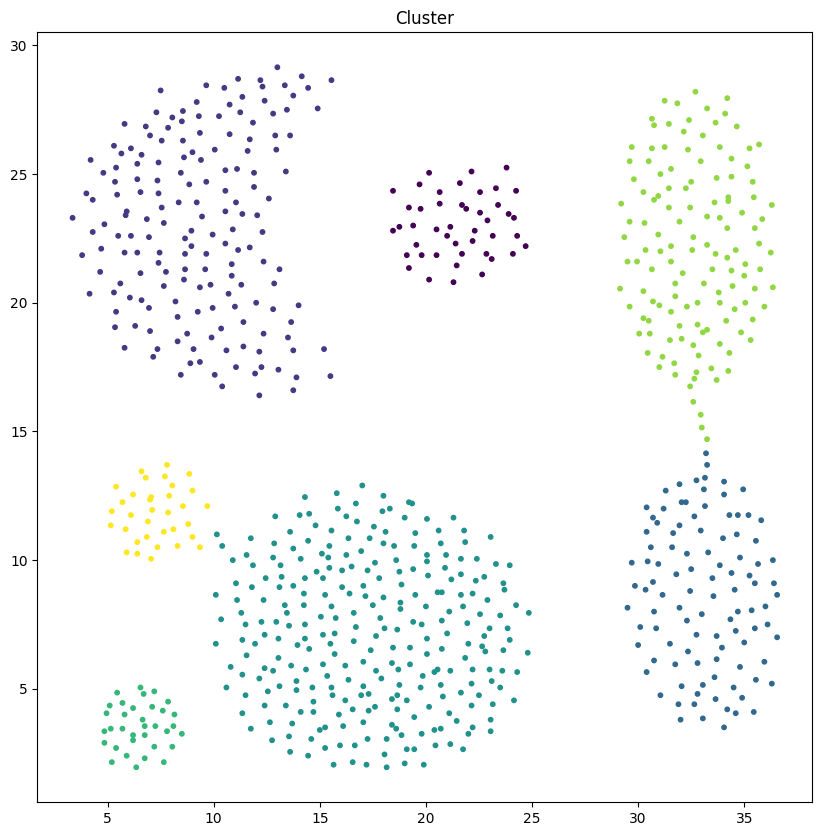

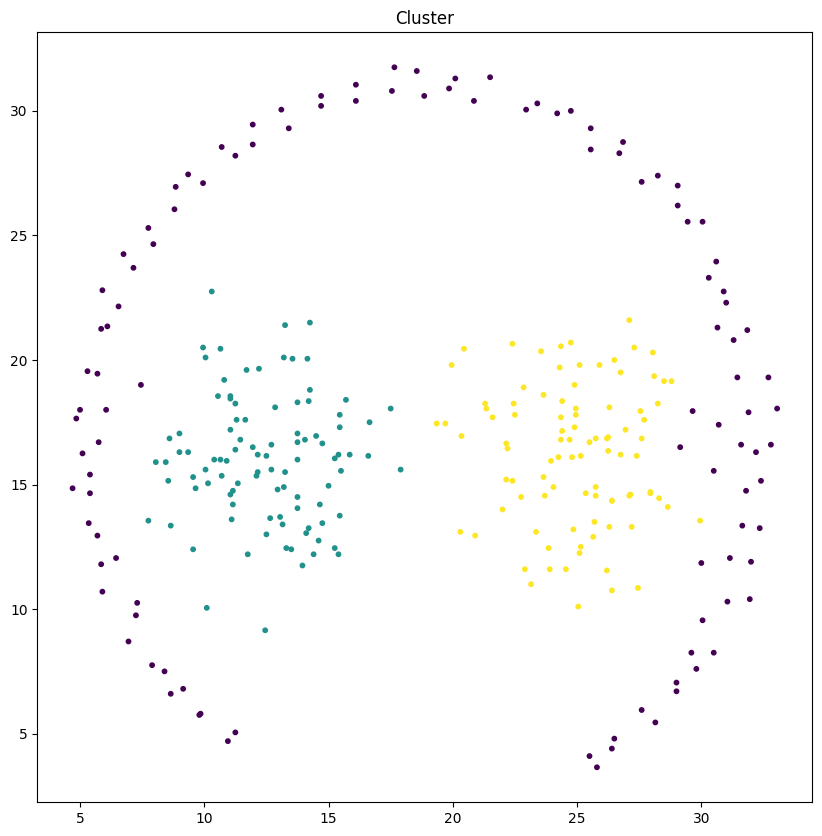

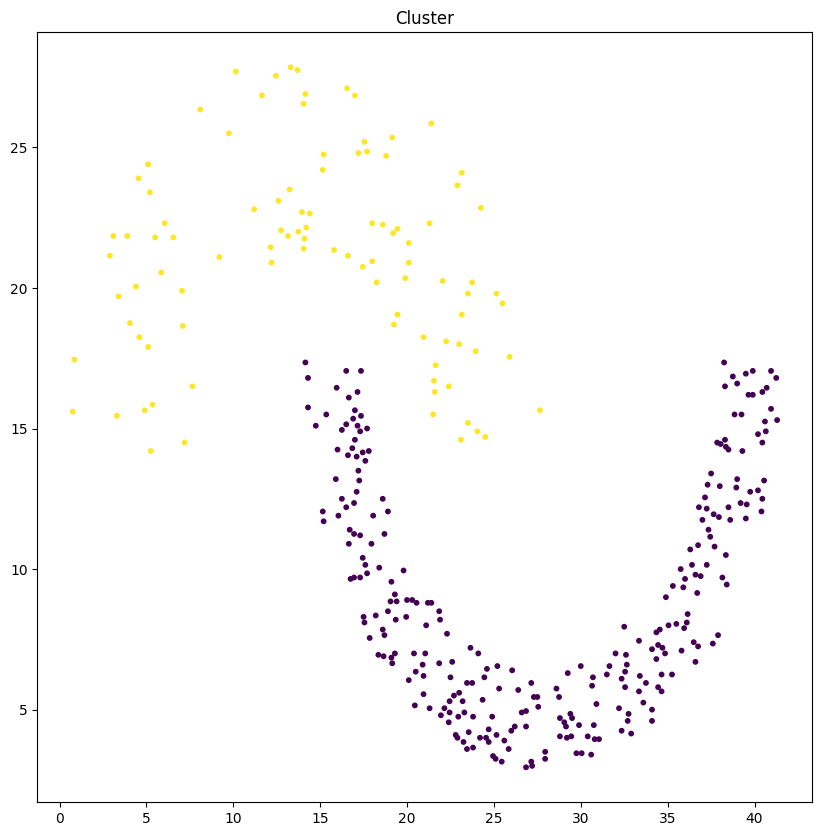

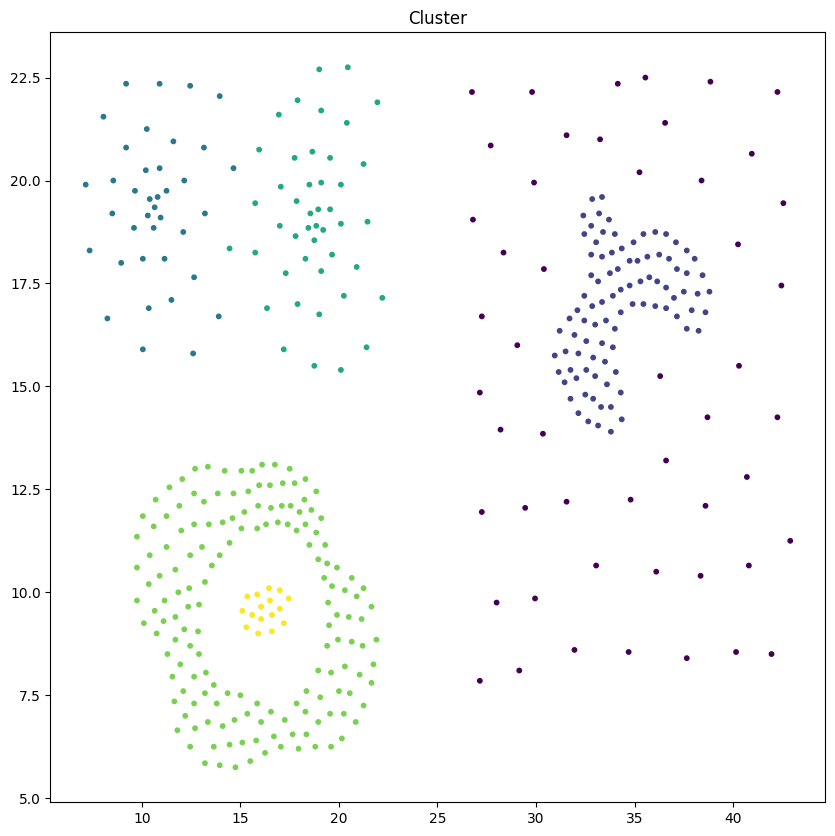

In [2]:
for cluster in clusters_paper():
    # plot
    plt.figure(figsize=(10, 10))
    plt.scatter(cluster['x'], cluster['y'], c=cluster['label'], s=10, cmap='viridis')
    plt.title('Cluster')
    plt.show()


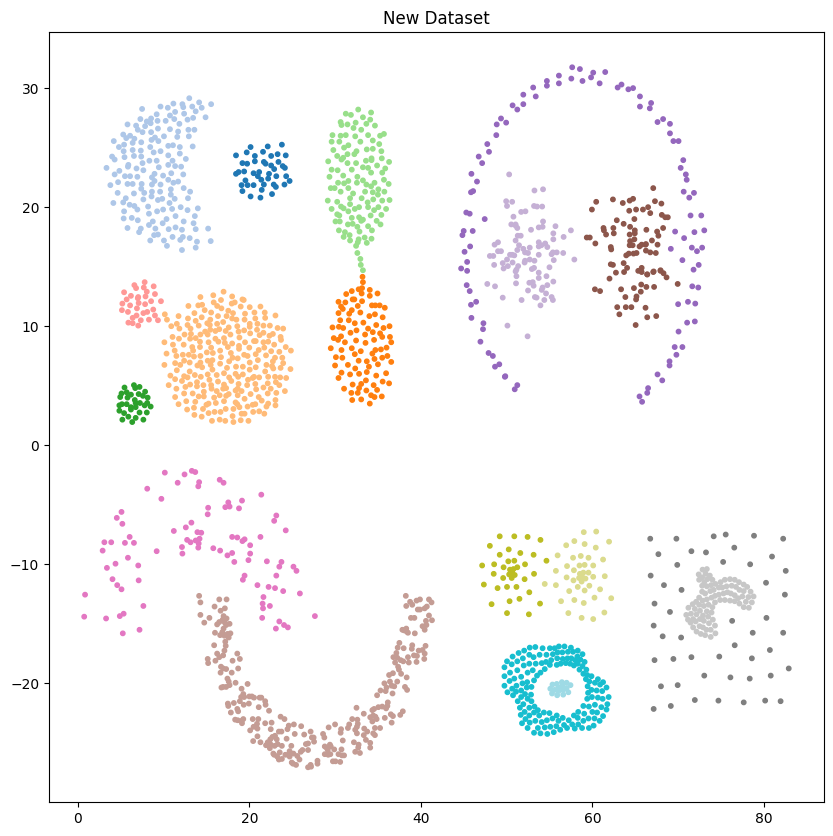

In [3]:
# I want a new dataset but with the points of S2 shifted to the right by 100 units and the points of S3 shifted to the left by 100 units
S1, S2, S3, S4 = clusters_paper()
# create a new dataset with the points of S2 shifted to the right by 100 units
s2_shifted = S2.copy()
s2_shifted['x'] += 40

# create a new dataset with the points of S3 shifted to the left by 100 units
s3_shifted = S3.copy()
s3_shifted['y'] -= 30
# misisng changing the labels to +len(S1.label) in the correct manner so they dont overlap
s2_shifted['label'] = s2_shifted['label'] + len(S1.label.unique())
s3_shifted['label'] = s3_shifted['label'] + (len(S1.label.unique()) + len(S2.label.unique()))

s4_shifted = S4.copy()
s4_shifted['x'] += 40
s4_shifted['y'] -= 30
s4_shifted['label'] = s4_shifted['label'] + (len(S1.label.unique()) + len(S2.label.unique()) + len(S3.label.unique()))
# combine the datasets
new_dataset = pd.concat([S1, s2_shifted, s3_shifted, s4_shifted])

# plot the new dataset
plt.figure(figsize=(10, 10))
plt.scatter(new_dataset['x'], new_dataset['y'], c=new_dataset['label'], s=10, cmap='tab20')
plt.title('New Dataset')
plt.show()


In [4]:
new_dataset.to_csv('../datasets/S5.csv', index=False)